# Implementing the ANN classifier using Keras in Python.

## 1. Importing the libraries and Load the dataset and Remove/replace missing values

### Importing Libraires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

### Loading the dataset

In [2]:
adv_df = pd.read_csv('advertising-1.csv')

### Exploratory Analysis

In [3]:
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
len(adv_df)

1000

In [5]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
adv_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
adv_df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot:>

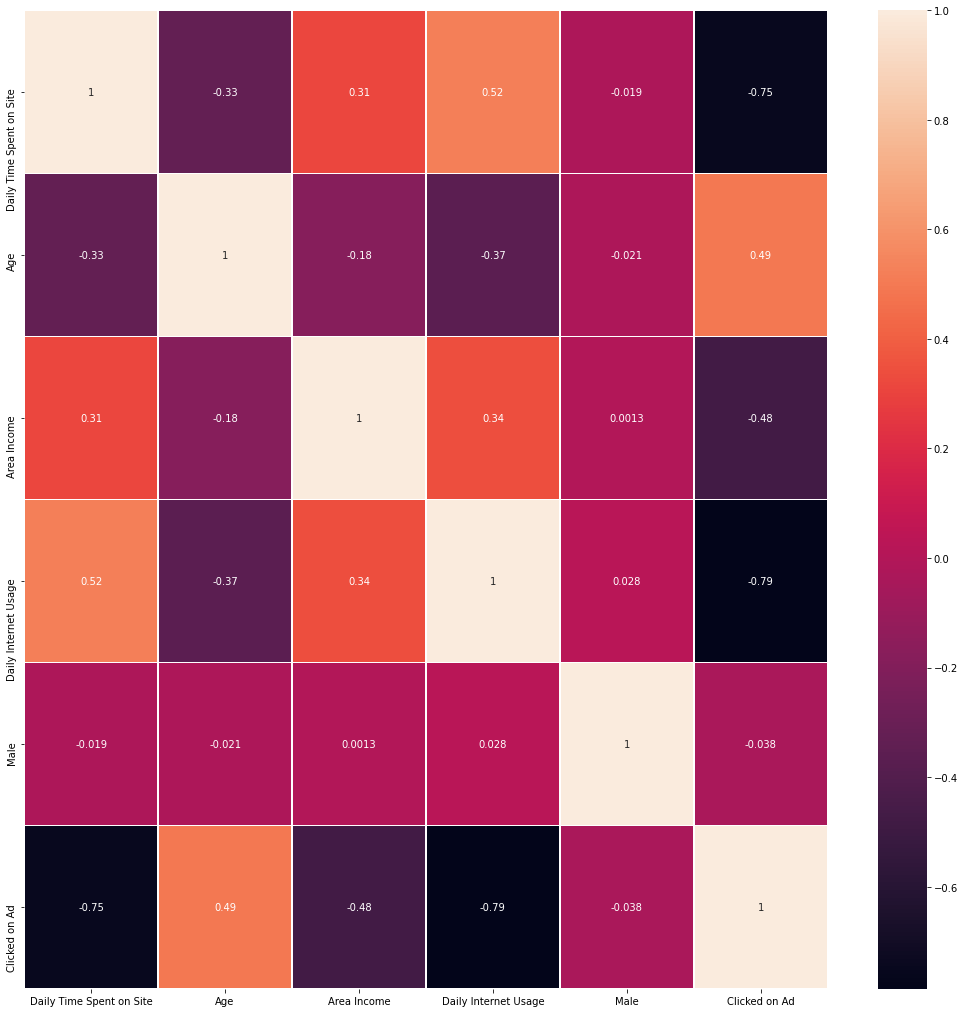

In [8]:
fig, ax = plt.subplots(figsize=(18,18))
var_corr = adv_df.corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, linewidths=.5, ax=ax)

### Remove/replace missing values

In [9]:
adv_df.isnull().values.any()

False

In [10]:
adv_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64



## 2. Split features and labels

### Splitting into Features and Label

In [11]:
X = adv_df.iloc[:, 0:9].values
y = adv_df.iloc[:, 9].values

### Encoding categorical data…

In [12]:
labelencoder_X_1 = LabelEncoder()
X[:, 4] = labelencoder_X_1.fit_transform(X[:, 4])
labelencoder_X_2 = LabelEncoder()
X[:, 5] = labelencoder_X_2.fit_transform(X[:, 5])
labelencoder_X_3 = LabelEncoder()
X[:, 7] = labelencoder_X_3.fit_transform(X[:, 7])
labelencoder_X_4 = LabelEncoder()
X[:, 8] = labelencoder_X_4.fit_transform(X[:, 8])
print (X)

[[68.95 35 61833.9 ... 0 215 439]
 [80.23 31 68441.85 ... 1 147 474]
 [69.47 26 59785.94 ... 0 184 367]
 ...
 [51.63 51 42415.72 ... 1 140 150]
 [55.55 19 41920.79 ... 0 85 422]
 [45.01 26 29875.8 ... 0 28 772]]




## 3. Splitting train and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

###  Feature Scaling 

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## 4. Implementing ANN Classifier using Keras

### Building a sequential model

In [15]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

### Fitting the model to the training data for some epochs. 

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
4/4 [==============================] - 2s 195ms/step - loss: 0.7087 - accuracy: 0.4740 - val_loss: 0.6545 - val_accuracy: 0.6200
Epoch 2/25
4/4 [==============================] - 0s 24ms/step - loss: 0.6552 - accuracy: 0.6169 - val_loss: 0.6151 - val_accuracy: 0.8000
Epoch 3/25
4/4 [==============================] - 0s 29ms/step - loss: 0.6151 - accuracy: 0.7107 - val_loss: 0.5759 - val_accuracy: 0.9100
Epoch 4/25
4/4 [==============================] - 0s 28ms/step - loss: 0.5750 - accuracy: 0.7790 - val_loss: 0.5341 - val_accuracy: 0.9600
Epoch 5/25
4/4 [==============================] - 0s 30ms/step - loss: 0.5422 - accuracy: 0.8200 - val_loss: 0.4879 - val_accuracy: 0.9600
Epoch 6/25
4/4 [==============================] - 0s 47ms/step - loss: 0.4994 - accuracy: 0.8594 - val_loss: 0.4376 - val_accuracy: 0.9700
Epoch 7/25
4/4 [==============================] - 0s 70ms/step - loss: 0.4610 - accuracy: 0.8820 - val_loss: 0.3839 - val_accuracy: 0.9650
Epoch 8/25
4/4 [==========

### saving the model 

In [17]:
model.save('advertising_model.h5') 



## 5. Calculating accuracy measures

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

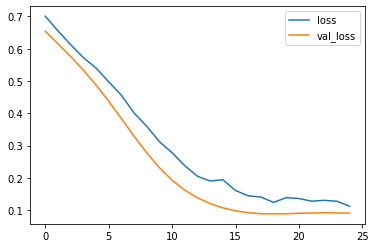

In [19]:
losses[['loss','val_loss']].plot()

## Displaying a classification report and confusion matrix

In [20]:
y_predictions = model.predict_classes(X_test)

A:\python\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.96      0.95      0.95        95

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [22]:
cm = confusion_matrix(y_test, y_predictions)
print (cm)

[[101   4]
 [  5  90]]


In [23]:
print("Accuracy" , metrics.accuracy_score(y_test,  y_predictions))

Accuracy 0.955


Based on above evaluation findings(Accuracy = 0.955 and confusion matrix values) the trainig data was well fitted into model and able to predict the test data classification labels.